In [44]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

Pandas library: Pandas can be an incredible tool for making data analysis accessible. It is possible to use this Python library to perform EDA and find relationships in the data.

In [2]:
sae=pd.read_csv('../data/sae_dataset.csv', low_memory=False)

## Exploring the Data

In [3]:
sae.head()

,VehicleMarketCode,VehicleNationalCode,VehicleSegmentationGlobal,VehicleModelIntlName,Bodytype_Group,Fuel_Group,Transmission_Group,Drivetype_Group,VehicleKW,VehicleDoors,...,VehicleProductionEnd,VehicleMakeIntlName,SAEReporteddate,StockDays,PostCode,registration_date,Mileage,Price,oricpric,PriceChangeCount
0,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,12/1/2011,OPEL / VAUXHALL,2/3/2020,12,28983,7/1/2008,238000,2990,2990.0,NaN
1,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,12/1/2011,OPEL / VAUXHALL,2/3/2020,86,8940,6/15/2010,90000,4499,4499.0,NaN
2,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,12/1/2011,OPEL / VAUXHALL,2/3/2020,279,8840,7/1/2005,210000,2490,2700.0,1.0
3,ES,30020,E,607,Sedan,Diesel,Automated,2WD,150,4.0,...,8/1/2012,PEUGEOT,10/12/2022,55,27002,10/15/2009,259000,6500,6500.0,NaN
4,ES,30020,E,607,Sedan,Diesel,Automated,2WD,150,4.0,...,8/1/2012,PEUGEOT,2/3/2020,75,18015,7/1/2006,155000,4900,7500.0,1.0


### 1. Descriptive statistics

#### Data Types

In order to get a basic understanding of the dataset, I explore the data type in each column:

In [4]:
sae.dtypes

VehicleMarketCode             object
VehicleNationalCode            int64
VehicleSegmentationGlobal     object
VehicleModelIntlName          object
Bodytype_Group                object
Fuel_Group                    object
Transmission_Group            object
Drivetype_Group               object
VehicleKW                      int64
VehicleDoors                 float64
VehicleWheelBase             float64
VehicleSeats                   int64
VehicleGrossNewPrice         float64
VehicleProductionStart        object
VehicleProductionEnd          object
VehicleMakeIntlName           object
SAEReporteddate               object
StockDays                      int64
PostCode                      object
registration_date             object
Mileage                        int64
Price                          int64
oricpric                     float64
PriceChangeCount             float64
dtype: object

##### Taking a look the data structures it is necessary to change the data types for some columns:
* Natcode is the ID of AVG, so it should be a categorical data. Then, change Integer to String
* Fields related to date are strings instead of datetime. I will set as a date

In [5]:
sae['VehicleNationalCode']=sae['VehicleNationalCode'].astype('str')

In [6]:
sae['registration_date']=pd.to_datetime(sae['registration_date'], format='%m/%d/%Y')

In [7]:
sae['SAEReporteddate']=pd.to_datetime(sae['SAEReporteddate'], format='%m/%d/%Y')

In [8]:
sae['VehicleProductionStart']=pd.to_datetime(sae['VehicleProductionStart'], format='%m/%d/%Y')

In [9]:
sae['VehicleProductionEnd']=pd.to_datetime(sae['VehicleProductionEnd'], format='%m/%d/%Y', errors='coerce')

##### Check again the types of data to confirm those changes

In [10]:
sae.dtypes

VehicleMarketCode                    object
VehicleNationalCode                  object
VehicleSegmentationGlobal            object
VehicleModelIntlName                 object
Bodytype_Group                       object
Fuel_Group                           object
Transmission_Group                   object
Drivetype_Group                      object
VehicleKW                             int64
VehicleDoors                        float64
VehicleWheelBase                    float64
VehicleSeats                          int64
VehicleGrossNewPrice                float64
VehicleProductionStart       datetime64[ns]
VehicleProductionEnd         datetime64[ns]
VehicleMakeIntlName                  object
SAEReporteddate              datetime64[ns]
StockDays                             int64
PostCode                             object
registration_date            datetime64[ns]
Mileage                               int64
Price                                 int64
oricpric                        

##### I would like to consider as a variable the difference between Registration_date and SAEReportedDate in order to know the age time of the vehicle

In [11]:
sae['YearOfReg']=(sae['SAEReporteddate'] - sae['registration_date'])/np.timedelta64(1,'Y')

Maybe the duration of the model could be interesting. Let's calculate and take a decision after some analysis

In [12]:
sae['YearOfMod']=(sae['VehicleProductionEnd'] - sae['VehicleProductionStart'])/np.timedelta64(1,'Y')

##### Let's examine how much missing data is in each column

In [13]:
sae.isna().sum()

VehicleMarketCode                 0
VehicleNationalCode               0
VehicleSegmentationGlobal         0
VehicleModelIntlName              0
Bodytype_Group                    0
Fuel_Group                        0
Transmission_Group                0
Drivetype_Group                   0
VehicleKW                         0
VehicleDoors                     21
VehicleWheelBase                 46
VehicleSeats                      0
VehicleGrossNewPrice              0
VehicleProductionStart            0
VehicleProductionEnd           6557
VehicleMakeIntlName               0
SAEReporteddate                   0
StockDays                         0
PostCode                          0
registration_date                 0
Mileage                           0
Price                             0
oricpric                        196
PriceChangeCount             119008
YearOfReg                         0
YearOfMod                      6557
dtype: int64

#### Summarizing the Data (only valid for Numeric columns)

In order to look at multiple descriptive statistics at once, I use the describe function. This will show the count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and the maximum.

In [14]:
sae.describe()

,VehicleKW,VehicleDoors,VehicleWheelBase,VehicleSeats,VehicleGrossNewPrice,StockDays,Mileage,Price,oricpric,PriceChangeCount,YearOfReg,YearOfMod
count,192880.000000,192859.000000,192834.000000,192880.000000,192880.000000,192880.000000,192880.000000,192880.000000,1.926840e+05,73872.000000,192880.000000,186323.000000
mean,98.682186,4.707465,2670.309411,4.904920,30259.096283,77.281688,76988.615009,18394.630418,1.870669e+04,1.889173,4.386211,2.275416
std,47.152377,0.696083,180.183084,0.725362,18962.733322,75.502168,57069.621542,13789.559508,1.668670e+04,1.773183,2.821825,1.153331
min,4.000000,2.000000,1686.000000,1.000000,7140.000000,0.000000,1.000000,1390.000000,-1.000000e+00,1.000000,0.052020,0.000000
25%,73.000000,5.000000,2580.000000,5.000000,20450.000000,19.000000,27780.750000,10990.000000,1.110000e+04,1.000000,2.280677,1.412760
50%,88.000000,5.000000,2648.000000,5.000000,25850.000000,53.000000,69000.000000,15400.000000,1.550000e+04,1.000000,4.243756,2.171160
75%,110.000000,5.000000,2728.000000,5.000000,33390.000000,110.000000,113727.750000,21028.000000,2.150000e+04,2.000000,5.804363,3.000746
max,586.000000,6.000000,4522.000000,9.000000,407250.000000,401.000000,350000.000000,415900.000000,2.390000e+06,95.000000,15.992115,7.753753


The two main measures of central tendency are the mean and the median (50th percentile). Those columns that are close in value, means the data is symmetrically distributed around the mean.
On most important fields considered for the first analysis, I'm seeing the mean is greater than the median, so data is right skewed. This means there are few outliers that influence the mean.

In addition, there are some mistakes in dataset, mainly in "oricpric" column as min/max values. Let's take a quick look

In [15]:
num_var=sae.select_dtypes(exclude=['object','datetime64'])

In [48]:
num_var['oricpric'].max()

2390000.0

In [49]:
num_var['oricpric'].min()

-1.0

In [18]:
sae.loc[num_var.oricpric.idxmax():].head(1)

,VehicleMarketCode,VehicleNationalCode,VehicleSegmentationGlobal,VehicleModelIntlName,Bodytype_Group,Fuel_Group,Transmission_Group,Drivetype_Group,VehicleKW,VehicleDoors,...,SAEReporteddate,StockDays,PostCode,registration_date,Mileage,Price,oricpric,PriceChangeCount,YearOfReg,YearOfMod
165374,ES,85177,C SUV,Sportage,Closed SUV,Diesel,Manual,2WD,85,5.0,...,2022-10-12,210,8201,2020-01-15,22500,26900,2390000.0,3.0,2.740645,1.420974


In [19]:
sae.loc[num_var.oricpric.idxmin():].head(1)

,VehicleMarketCode,VehicleNationalCode,VehicleSegmentationGlobal,VehicleModelIntlName,Bodytype_Group,Fuel_Group,Transmission_Group,Drivetype_Group,VehicleKW,VehicleDoors,...,SAEReporteddate,StockDays,PostCode,registration_date,Mileage,Price,oricpric,PriceChangeCount,YearOfReg,YearOfMod
176873,PT,53118,C,Giulietta,Hatchback,Diesel,Manual,2WD,77,5.0,...,2022-10-12,153,3780-621,2011-04-15,67021,12850,-1.0,1.0,11.493734,2.915871


#### The best way to explore all numeric fields without investigating them individually is to create a heatmap. I can use it to visualize the pairwise correlations between each two variables

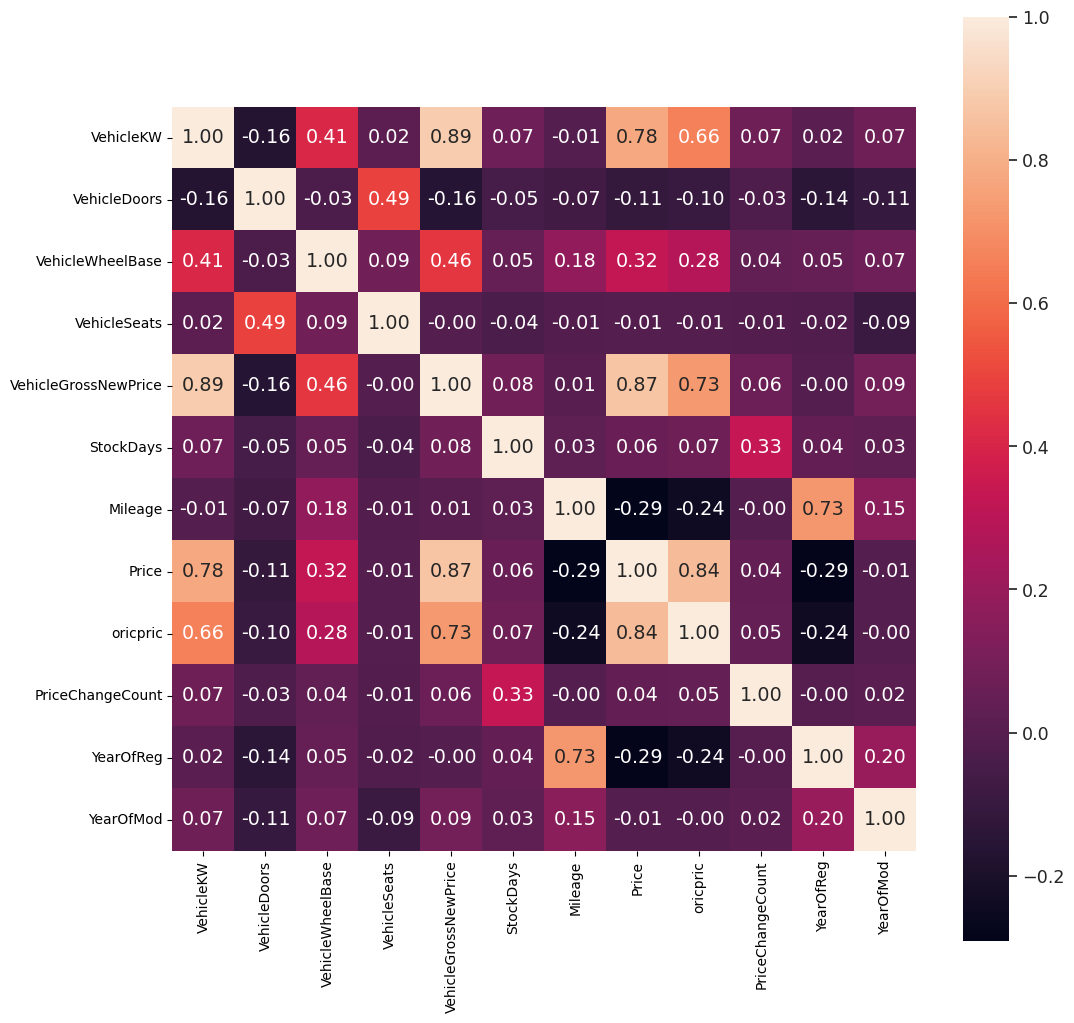

In [20]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)

sns.set(font_scale = 1.15)
sns.heatmap(sae.corr(),
           cbar=True,
           annot=True,
           square=True,
           fmt='.2f',
           ax=ax);

#### Get correlation between two categorical variables and a categorical variable and continuous variable

Thinking to build a regression model it is necessary to understand the correlation between 2 categorical variables and correlation between a multi level categorical variable and continuous variable.

* Checking if two categorical variables are independent can be done with Chi-Squared test of independence. (https://en.wikipedia.org/wiki/Chi-square_test)
* Checking categorical vs numerical variables, the best way is ANOVA test. (http://mlwiki.org/index.php/One-Way_ANOVA_F-Test)

In [21]:
cat_var=sae.select_dtypes(exclude=['float','int'])

In [22]:
cat_var.head()

,VehicleMarketCode,VehicleNationalCode,VehicleSegmentationGlobal,VehicleModelIntlName,Bodytype_Group,Fuel_Group,Transmission_Group,Drivetype_Group,VehicleProductionStart,VehicleProductionEnd,VehicleMakeIntlName,SAEReporteddate,PostCode,registration_date
0,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,2004-07-01,2011-12-01,OPEL / VAUXHALL,2020-02-03,28983,2008-07-01
1,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,2004-07-01,2011-12-01,OPEL / VAUXHALL,2020-02-03,8940,2010-06-15
2,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,2004-07-01,2011-12-01,OPEL / VAUXHALL,2020-02-03,8840,2005-07-01
3,ES,30020,E,607,Sedan,Diesel,Automated,2WD,2004-12-01,2012-08-01,PEUGEOT,2022-10-12,27002,2009-10-15
4,ES,30020,E,607,Sedan,Diesel,Automated,2WD,2004-12-01,2012-08-01,PEUGEOT,2020-02-03,18015,2006-07-01


### ANOVA Test

#### I'd like to determine wheter a vehicle's Fuel, Transmission and Drivetype have an impact on their value

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Linear Regression

Linear regression is simple but powerful model to analyze relationship between a set of independent and dependent variables.

I will create a linear model predicting value using 'VehicleKW','VehicleGrossNewPrice','Mileage' and 'YearOfReg'.

In [41]:
Y = sae['Price']
X = sm.add_constant(sae[['VehicleKW','YearOfReg']])

linear_reg=sm.OLS(Y,X).fit()
predictions=linear_reg.predict(X)
linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                 2.225e+05
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:18:53   Log-Likelihood:            -1.9968e+06
No. Observations:              192880   AIC:                         3.994e+06
Df Residuals:                  192877   BIC:                         3.994e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2119.5507     47.892     44.257      0.000    2025.684    2213.417
VehicleKW    229.6065      0.366    626.952      0.000     228.889     230.324
YearOfReg  -1455.2400      6.120   -237.800      0.000   -1467.234   -1443.246
==============================================================================
Omnibus:                   231233.159   Durbin-Watson:                   0.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        149249354.366
Skew:                           5.807   Prob(JB):                         0.00
Kurtosis:                     138.780   Cond. No.                         304.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
Y= sae['Price']
X = sm.add_constant(sae[['VehicleKW','VehicleGrossNewPrice','Mileage','YearOfReg']])

linear_reg=sm.OLS(Y,X).fit()
predictions=linear_reg.predict(X)
linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                 2.693e+05
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:57:24   Log-Likelihood:            -1.9304e+06
No. Observations:              192880   AIC:                         3.861e+06
Df Residuals:                  192875   BIC:                         3.861e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5642.7911     34.982    161.306      0.000    5574.228    5711.355
VehicleKW                9.4264      0.580     16.250      0.000       8.289      10.563
VehicleGrossNewPrice     0.6097      0.001    422.867      0.000       0.607       0.613
Mileage                 -0.0469      0.000   -149.328      0.000      -0.048      -0.046
YearOfReg             -688.1214      6.353   -108.311      0.000    -700.574    -675.669
==============================================================================
Omnibus:                    79765.048   Durbin-Watson:                   0.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13526817.251
Skew:                           0.904   Prob(JB):                         0.00
Kurtosis:                      43.986   Cond. No.                     2.84e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let look at the most significant statistic and how can that affect the reliability of the result.

https://jyotiyadav99111.medium.com/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01

Next, create a second regression model predicting price using oricpric.

In [42]:
X = sm.add_constant(sae[['VehicleGrossNewPrice']])

linear_reg=sm.OLS(Y,X).fit()
predictions=linear_reg.predict(X)
linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 5.807e+05
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:19:06   Log-Likelihood:            -1.9782e+06
No. Observations:              192880   AIC:                         3.956e+06
Df Residuals:                  192878   BIC:                         3.956e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -670.2373     29.524    -22.702      0.000    -728.103    -612.371
VehicleGrossNewPrice     0.6301      0.001    762.069      0.000       0.628       0.632
==============================================================================
Omnibus:                    49534.637   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3019306.303
Skew:                           0.331   Prob(JB):                         0.00
Kurtosis:                      22.371   Cond. No.                     6.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
from scipy.stats import linregress

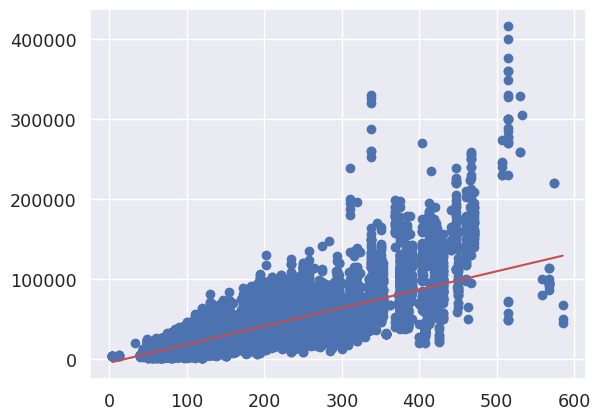

In [47]:
def linear_regression_plot(q,m):
    slope, intercept, r_value, p_value, std_err = linregress(q,m)
    
    def fn(x):
        return x * slope+intercept
    x = np.arange(q.min(),q.max(),1)
    
    y = [fn(x0) for x0 in x]
    plt.plot(x,y,'r')
    plt.scatter(q,m)
    
linear_regression_plot(sae['VehicleKW'], sae['Price'])

### Others interesting calculations

I would like to know how many bodytypes are in the dataset

In [55]:
pd.crosstab(index=sae.Bodytype_Group, columns='count')

col_0,count
Bodytype_Group,
Cabrio,2506
Cabrio SUV,275
Chassis,265
Chassis double cabin,31
Closed SUV,58046
Combi,1191
Coupe,3110
Coupe SUV,3255
Hatchback,70058


I would like to know how many vehicles increased their price between the original price and current price.

In [57]:
sae['increase_price']=np.where(sae.Price>sae.oricpric, 'increase','decrease')
pd.crosstab(index=sae.VehicleMakeIntlName, columns=sae.increase_price)

increase_price,decrease,increase
VehicleMakeIntlName,,
ABARTH,401,10
ALFA ROMEO,873,36
ALPINE,11,0
ASTON MARTIN,40,3
AUDI,2995,108
...,...,...
TATA,4,1
TESLA,403,39
TOYOTA,9422,428


##### How many cars have an average Price no more than the mean (18395)?

In [45]:
price_avg = sae['Price']

In [46]:
price_avg.mean()

18394.6304178764

In [47]:
price_avg_low = price_avg[price_avg < 18395]

In [48]:
len(price_avg_low)

125070

##### I want to know which vehicles have a Price and Mileage below than each average

In [112]:
sae[(sae['Mileage'] <=76989) & (sae['Price']<18395)]

,VehicleMarketCode,VehicleNationalCode,VehicleSegmentationGlobal,VehicleModelIntlName,Bodytype_Group,Fuel_Group,Transmission_Group,Drivetype_Group,VehicleKW,VehicleDoors,...,VehicleProductionEnd,VehicleMakeIntlName,SAEReporteddate,StockDays,PostCode,registration_date,Mileage,Price,oricpric,PriceChangeCount
49,ES,33717,Pure Pickup,Rexton,Stationwagon,Diesel,Manual,4WD,121,5.0,...,6/1/2011,SSANGYONG,2/3/2020,47,50410,7/1/2011,52000,10495,10495.0,NaN
69,ES,33845,Large LCV,Ducato,Panel van,Diesel,Manual,2WD,88,4.0,...,10/1/2011,FIAT,2/3/2020,167,45500,7/1/2009,15000,4900,5000.0,2.0
145,ES,34292,Small LCV,Combo,Stationwagon,Diesel,Manual,2WD,55,4.0,...,12/1/2011,OPEL / VAUXHALL,2/3/2020,250,50180,7/1/2011,74000,6990,5776.0,1.0
174,ES,34380,D SUV,Captiva,Closed SUV,Petrol,Manual,2WD,100,5.0,...,4/1/2011,CHEVROLET,10/12/2022,198,46910,7/1/2009,57000,10990,10990.0,NaN
187,ES,34383,D SUV,Captiva,Closed SUV,Diesel,Manual,4WD,110,5.0,...,4/1/2011,CHEVROLET,10/12/2022,23,50410,7/1/2009,13226,9490,9490.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192772,PT,932169,B,Space Star / Mirage,Hatchback,Petrol,Manual,2WD,52,5.0,...,3/1/2022,MITSUBISHI,10/12/2022,28,4100,6/15/2021,43721,13740,13740.0,NaN
192787,PT,932764,B,Rio,Hatchback,Petrol,Automated,2WD,62,5.0,...,12/1/9999,KIA,10/12/2022,12,4520,9/15/2022,200,17950,17950.0,NaN
192806,PT,934316,B,Rio,Hatchback,Petrol,Manual,2WD,74,5.0,...,6/1/2022,KIA,10/12/2022,2,3025,1/15/2022,1000,18000,18000.0,NaN
192872,PT,934436,A,Aygo X,Hatchback,Petrol,Manual,2WD,53,5.0,...,12/1/9999,TOYOTA,10/12/2022,23,3885,1/15/2022,4500,17000,17000.0,NaN


##### What are the top 5 body types that have the most number of vehicles?

In [65]:
top_bodytypes=sae['Bodytype_Group'].value_counts()
top_bodytypes.head(5)

Hatchback       70058
Closed SUV      58046
Stationwagon    21629
MPV             13470
Sedan           12520
Name: Bodytype_Group, dtype: int64

In [66]:
top_segmentation=sae['VehicleSegmentationGlobal'].value_counts()
top_segmentation.head(5)

C        42373
B        33870
C SUV    28875
B SUV    19060
D        17022
Name: VehicleSegmentationGlobal, dtype: int64

##### Calculate the proportion of low price vehicles in each body/segmentation type based on the value counts

In [67]:
sae_lowprice = sae[sae['Price']<18395]

In [68]:
veh_bodytypes = sae_lowprice['Bodytype_Group'].value_counts()
veh_bodytypes

Hatchback               58841
Closed SUV              25457
Stationwagon            16433
MPV                     10263
Sedan                    6068
Panel van                4799
Coupe                    1282
Cabrio                    910
Combi                     644
Chassis                   160
Pick up double cabin      116
Pick up                    67
Chassis double cabin       22
Coupe SUV                   7
Cabrio SUV                  1
Name: Bodytype_Group, dtype: int64

In [70]:
(veh_bodytypes / top_bodytypes).sort_values(ascending=False)

Hatchback               0.839890
Panel van               0.803449
Pick up                 0.779070
MPV                     0.761915
Stationwagon            0.759767
Chassis double cabin    0.709677
Chassis                 0.603774
Combi                   0.540722
Sedan                   0.484665
Closed SUV              0.438566
Coupe                   0.412219
Cabrio                  0.363128
Pick up double cabin    0.249462
Cabrio SUV              0.003636
Coupe SUV               0.002151
Name: Bodytype_Group, dtype: float64

#### Calculate the proportion of high price vehicles in each body/segmentation type based on the value counts

In [71]:
sae_highprice = sae[sae['Price']>=18395]

In [72]:
veh_bodytypes2 = sae_highprice['Bodytype_Group'].value_counts()
veh_bodytypes2

Closed SUV              32589
Hatchback               11217
Sedan                    6452
Stationwagon             5196
Coupe SUV                3248
MPV                      3207
Coupe                    1828
Cabrio                   1596
Panel van                1174
Combi                     547
Pick up double cabin      349
Cabrio SUV                274
Chassis                   105
Pick up                    19
Chassis double cabin        9
Name: Bodytype_Group, dtype: int64

In [73]:
(veh_bodytypes2 / top_bodytypes).sort_values(ascending=False)

Coupe SUV               0.997849
Cabrio SUV              0.996364
Pick up double cabin    0.750538
Cabrio                  0.636872
Coupe                   0.587781
Closed SUV              0.561434
Sedan                   0.515335
Combi                   0.459278
Chassis                 0.396226
Chassis double cabin    0.290323
Stationwagon            0.240233
MPV                     0.238085
Pick up                 0.220930
Panel van               0.196551
Hatchback               0.160110
Name: Bodytype_Group, dtype: float64

In [74]:
veh_segmentation = sae_lowprice['VehicleSegmentationGlobal'].value_counts()
veh_segmentation

C                   32061
B                   30772
B SUV               13126
D                   10054
C SUV               10004
C MPV                7004
Small LCV            6145
A                    6001
D SUV                2139
D MPV                2050
Large LCV            1375
B MPV                1197
Medium LCV           1151
E                     536
M                     321
Pure Pickup           312
BCDV                  292
Sport                 246
E SUV                 194
F                      42
Light Pickup           16
E MPV                  12
MCDV                   10
VDC                     7
G SUV                   2
Large LCV Pickup        1
Name: VehicleSegmentationGlobal, dtype: int64

In [76]:
(veh_segmentation / top_segmentation).sort_values(ascending=False)

VDC                  1.000000
MCDV                 1.000000
BCDV                 1.000000
B MPV                0.968447
Small LCV            0.966955
A                    0.964016
Light Pickup         0.941176
B                    0.908533
M                    0.874659
C MPV                0.794825
C                    0.756637
B SUV                0.688667
Large LCV            0.629867
D MPV                0.604898
D                    0.590647
Medium LCV           0.559009
Pure Pickup          0.460857
C SUV                0.346459
E MPV                0.333333
Large LCV Pickup     0.250000
D SUV                0.223184
Sport                0.172390
E                    0.131083
F                    0.051980
E SUV                0.049693
G SUV                0.013158
G                         NaN
Medium LCV Pickup         NaN
Small LCV Pickup          NaN
Name: VehicleSegmentationGlobal, dtype: float64

##### What is the mean price by bodytype?

In [79]:
sae.groupby(['Bodytype_Group']).mean()['Price'].sort_values(ascending=False)

Bodytype_Group
Cabrio SUV              41955.629091
Coupe                   39168.321543
Coupe SUV               35578.742550
Cabrio                  33346.100958
Sedan                   24367.907907
Closed SUV              22563.855408
Pick up double cabin    22241.045161
Combi                   18523.935348
Chassis                 17596.328302
Chassis double cabin    16914.129032
Pick up                 15308.290698
Stationwagon            15250.424800
MPV                     14681.823460
Hatchback               13645.170002
Panel van               13046.417546
Name: Price, dtype: float64

##### What is the mean price by segmentation?

In [81]:
pd.pivot_table(sae, index=['VehicleSegmentationGlobal'], values='Price')

,Price
VehicleSegmentationGlobal,
A,10485.352129
B,12072.931296
B MPV,11275.692557
B SUV,17062.114166
BCDV,6486.739726
C,15156.537630
C MPV,13960.656264
C SUV,21866.638338
D,20211.628716


##### For each Segmentation and Bodytype, I want to know the mean, median, min, max and std for the Mileage and Price

In [86]:
pd.pivot_table(sae, index=['VehicleSegmentationGlobal', 'Bodytype_Group'], values=['Mileage','Price'], aggfunc= [np.mean, np.median, min, max, np.std])

mean                 \
                                                Mileage          Price   
VehicleSegmentationGlobal Bodytype_Group                                 
A                         Cabrio           52178.214932   13079.703620   
                          Hatchback        47074.720214   10287.063462   
B                         Cabrio           35190.586667   23976.648000   
                          Coupe            82307.142857   24560.000000   
                          Hatchback        62346.693181   11859.366159   
...                                                 ...            ...   
Sport                     Cabrio           56137.871951   49203.512195   
                          Coupe            57680.648980   62587.323810   
                          Hatchback        57606.200000  103470.000000   
                          Sedan            29706.548387  149107.709677   
VDC                       Hatchback       116230.142857    7470.000000   

                                           median               min         \
                                          Mileage     Price Mileage  Price   
VehicleSegmentationGlobal Bodytype_Group                                     
A                         Cabrio          39248.5   11900.0       5   5990   
                          Hatchback       35000.0    9950.0       1   1999   
B                         Cabrio          24520.0   23000.0      18   7399   
                          Coupe           98000.0   16900.0    4000  12900   
                          Hatchback       51833.0   11250.0       1   1990   
...                                           ...       ...     ...    ...   
Sport                     Cabrio          45000.0   29984.0     300   7990   
                          Coupe           50500.0   39999.0     100   3500   
                          Hatchback       46000.0   99950.0   38000  86900   
                          Sedan           34000.0  159900.0    1800  44900   
VDC                       Hatchback       97529.0    7500.0   31000   6500   

                                             max                   std  \
                                         Mileage   Price       Mileage   
VehicleSegmentationGlobal Bodytype_Group                                 
A                         Cabrio          230000   35900  40149.431422   
                          Hatchback       268000   34000  39198.874326   
B                         Cabrio          188000   52900  32004.995746   
                          Coupe           140000   44990  55410.381312   
                          Hatchback       330100   48500  47811.130093   
...                                          ...     ...           ...   
Sport                     Cabrio          280640  415900  42298.227773   
                          Coupe           267670  360000  44267.403313   
                          Hatchback        85421  120000  23269.184831   
                          Sedan            75000  208900  18400.393640   
VDC                       Hatchback       216000    9900  59180.161984   

                                                        
                                                 Price  
VehicleSegmentationGlobal Bodytype_Group                
A                         Cabrio           4671.457255  
                          Hatchback        3676.884951  
B                         Cabrio           6821.645853  
                          Coupe           14228.262953  
                          Hatchback        4633.050768  
...                                                ...  
Sport                     Cabrio          50378.293255  
                          Coupe           60152.519532  
                          Hatchback       14930.321497  
                          Sedan           45570.760329  
VDC                       Hatchback        1200.541544  

[80 rows x 10 columns]

In [88]:
sae['VehicleKW'].corr(sae['Price'])

0.7803504692777014

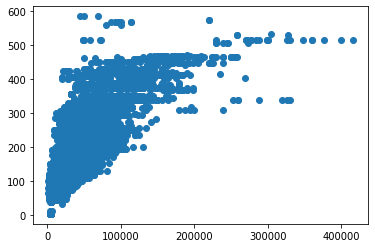

In [92]:
plt.scatter(sae['Price'], sae['VehicleKW'])

* From the scatter plot and correlation coefficient I can see that there is a correlation between Price and VehiclekW
* As the Price increases, VehicleKW increases also (positive correlation coefficient)

In [11]:
sae.corr()

,VehicleNationalCode,VehicleKW,VehicleDoors,VehicleWheelBase,VehicleSeats,VehicleGrossNewPrice,StockDays,Mileage,Price,oricpric,PriceChangeCount
VehicleNationalCode,1.000000,-0.083579,0.074072,-0.053826,0.014966,-0.043712,0.022416,-0.059653,0.033601,0.025691,-0.022766
VehicleKW,-0.083579,1.000000,-0.164631,0.411154,0.019813,0.893147,0.072940,-0.007747,0.780350,0.658813,0.068099
VehicleDoors,0.074072,-0.164631,1.000000,-0.029860,0.492131,-0.164046,-0.048805,-0.065068,-0.112948,-0.097082,-0.026988
VehicleWheelBase,-0.053826,0.411154,-0.029860,1.000000,0.087078,0.460204,0.050496,0.183192,0.324767,0.279545,0.035478
VehicleSeats,0.014966,0.019813,0.492131,0.087078,1.000000,-0.004058,-0.035278,-0.009541,-0.005404,-0.006874,-0.009697
VehicleGrossNewPrice,-0.043712,0.893147,-0.164046,0.460204,-0.004058,1.000000,0.081167,0.007500,0.866420,0.731732,0.063079
StockDays,0.022416,0.072940,-0.048805,0.050496,-0.035278,0.081167,1.000000,0.026342,0.061419,0.068441,0.334088
Mileage,-0.059653,-0.007747,-0.065068,0.183192,-0.009541,0.007500,0.026342,1.000000,-0.290476,-0.243228,-0.004943
Price,0.033601,0.780350,-0.112948,0.324767,-0.005404,0.866420,0.061419,-0.290476,1.000000,0.840604,0.039726
oricpric,0.025691,0.658813,-0.097082,0.279545,-0.006874,0.731732,0.068441,-0.243228,0.840604,1.000000,0.045027


In [19]:
Top10_sae_by_VehicleKW= sae.sort_values(by='VehicleKW', ascending=False).head(10)
Top10_sae_by_VehicleKW

,VehicleMarketCode,VehicleNationalCode,VehicleSegmentationGlobal,VehicleModelIntlName,Bodytype_Group,Fuel_Group,Transmission_Group,Drivetype_Group,VehicleKW,VehicleDoors,...,VehicleProductionEnd,VehicleMakeIntlName,SAEReporteddate,StockDays,PostCode,registration_date,Mileage,Price,oricpric,PriceChangeCount
174481,ES,92560,Sport,Challenger,Sedan,Petrol,Automated,2WD,586,2.0,...,7/1/2022,DODGE,10/12/2022,2,31500,7/1/2021,10700,50500,50500.0,NaN
174480,ES,92560,Sport,Challenger,Sedan,Petrol,Automated,2WD,586,2.0,...,7/1/2022,DODGE,10/12/2022,204,25126,7/1/2021,35000,68500,68500.0,NaN
174482,ES,92560,Sport,Challenger,Sedan,Petrol,Automated,2WD,586,2.0,...,7/1/2022,DODGE,10/12/2022,217,46470,7/1/2020,45000,44900,44900.0,NaN
109363,ES,73391,Sport,F12 Berlinetta,Coupe,Petrol,Automated,2WD,574,3.0,...,4/1/2018,FERRARI,2/3/2020,15,28803,7/1/2017,20000,220000,220000.0,NaN
109362,ES,73391,Sport,F12 Berlinetta,Coupe,Petrol,Automated,2WD,574,3.0,...,4/1/2018,FERRARI,2/3/2020,16,28806,3/15/2017,20000,220000,220000.0,NaN
164735,ES,84521,E SUV,Model X,Closed SUV,Electric,Automated,4WD,568,5.0,...,7/1/2019,TESLA,10/12/2022,231,38639,7/1/2020,20500,94990,94990.0,NaN
185188,PT,911463,E SUV,Model X,Closed SUV,Electric,Automated,4WD,568,5.0,...,12/1/2016,TESLA,2/3/2020,172,2840,12/15/2016,69000,94400,96900.0,2.0
185189,PT,911463,E SUV,Model X,Closed SUV,Electric,Automated,4WD,568,5.0,...,12/1/2016,TESLA,2/3/2020,78,2765,12/15/2016,45000,86875,76875.0,1.0
164732,ES,84521,E SUV,Model X,Closed SUV,Electric,Automated,4WD,568,5.0,...,7/1/2019,TESLA,10/12/2022,77,28930,7/1/2020,38900,113900,116900.0,1.0
164733,ES,84521,E SUV,Model X,Closed SUV,Electric,Automated,4WD,568,5.0,...,7/1/2019,TESLA,10/12/2022,3,48013,7/1/2020,34000,96000,96000.0,NaN


In [20]:
Bottom10_sae_by_Price= sae.sort_values(by='Price', ascending=True).head(10)
Bottom10_sae_by_Price

,VehicleMarketCode,VehicleNationalCode,VehicleSegmentationGlobal,VehicleModelIntlName,Bodytype_Group,Fuel_Group,Transmission_Group,Drivetype_Group,VehicleKW,VehicleDoors,...,VehicleProductionEnd,VehicleMakeIntlName,SAEReporteddate,StockDays,PostCode,registration_date,Mileage,Price,oricpric,PriceChangeCount
1678,ES,38298,C,Focus,Sedan,Diesel,Manual,2WD,80,4.0,...,1/1/2011,FORD (EUR),2/3/2020,17,28002,7/1/2008,347009,1390,1170.0,2.0
429,ES,36062,C MPV,Xsara Picasso,MPV,Diesel,Manual,2WD,66,5.0,...,3/1/2011,CITROEN,2/3/2020,9,48330,7/1/2007,318000,1399,1399.0,NaN
1661,ES,38291,C,Focus,Hatchback,Diesel,Manual,2WD,100,3.0,...,1/1/2011,FORD (EUR),10/12/2022,90,8860,7/1/2007,234000,1470,1470.0,NaN
442,ES,36062,C MPV,Xsara Picasso,MPV,Diesel,Manual,2WD,66,5.0,...,3/1/2011,CITROEN,2/3/2020,23,28047,7/1/2007,199000,1700,1700.0,NaN
399,ES,36060,C MPV,Xsara Picasso,MPV,Diesel,Manual,2WD,66,5.0,...,3/1/2011,CITROEN,2/3/2020,9,28047,7/1/2007,199000,1700,1700.0,NaN
2666,ES,40049,Small LCV,Berlingo,Combi,Diesel,Manual,2WD,55,4.0,...,12/1/2011,CITROEN,2/3/2020,10,41500,7/1/2009,255450,1750,1950.0,1.0
2856,ES,40365,Small LCV,Kangoo,Panel van,Diesel,Manual,2WD,50,4.0,...,1/1/2011,RENAULT,10/12/2022,49,27003,7/1/2009,300000,1800,1800.0,NaN
2674,ES,40050,Small LCV,Berlingo,Combi,Diesel,Manual,2WD,55,4.0,...,12/1/2011,CITROEN,2/3/2020,51,28100,6/15/2009,145000,1800,1800.0,NaN
25232,ES,53287,B,Corsa D,Hatchback,Diesel,Manual,2WD,55,5.0,...,10/1/2014,OPEL / VAUXHALL,2/3/2020,131,8227,7/1/2013,240000,1990,1990.0,NaN
5881,ES,43612,C MPV,Scenic III,MPV,Diesel,Manual,2WD,96,5.0,...,9/1/2011,RENAULT,2/3/2020,151,8227,7/1/2009,270000,1990,1990.0,NaN


In [21]:
Top10_sae_by_StockDays= sae.sort_values(by='StockDays', ascending=False).head(10)
Top10_sae_by_StockDays

,VehicleMarketCode,VehicleNationalCode,VehicleSegmentationGlobal,VehicleModelIntlName,Bodytype_Group,Fuel_Group,Transmission_Group,Drivetype_Group,VehicleKW,VehicleDoors,...,VehicleProductionEnd,VehicleMakeIntlName,SAEReporteddate,StockDays,PostCode,registration_date,Mileage,Price,oricpric,PriceChangeCount
89207,ES,68984,D SUV,Santa Fe,Closed SUV,Diesel,Automated,2WD,148,5.0,...,7/1/2018,HYUNDAI,2/3/2020,401,7610,7/1/2018,22285,30950,31700.0,1.0
116205,ES,74248,C MPV,Grand Scenic IV,MPV,Diesel,Automated,2WD,81,5.0,...,12/1/2018,RENAULT,2/3/2020,401,7610,7/1/2018,29796,20950,21950.0,1.0
49167,ES,60921,E SUV,X5,Closed SUV,Petrol,Automated,4WD,225,5.0,...,6/1/2018,BMW,2/3/2020,401,28049,7/1/2016,79000,48999,54999.0,3.0
82380,ES,67964,C SUV,Evoque,Closed SUV,Diesel,Manual,2WD,110,5.0,...,5/1/2018,LAND-ROVER,2/3/2020,401,10005,10/1/2017,23282,26600,28000.0,6.0
2127,ES,39408,E,A6 Avant,Stationwagon,Petrol,Automated,4WD,426,5.0,...,5/1/2011,AUDI,2/3/2020,401,8173,7/1/2008,190000,26900,34900.0,3.0
94449,ES,69942,D,Talisman,Sedan,Diesel,Manual,2WD,96,4.0,...,12/1/2018,RENAULT,2/3/2020,401,46190,7/1/2018,42650,19900,19900.0,4.0
40054,ES,57616,A,iOn,Hatchback,Electric,Automated,2WD,49,5.0,...,1/1/2020,PEUGEOT,2/3/2020,401,46701,7/1/2018,10200,14990,16900.0,4.0
138067,ES,78643,F,S-Class,Sedan,Diesel,Automated,2WD,210,4.0,...,12/1/2020,MERCEDES-BENZ,2/3/2020,401,28232,7/1/2018,10000,70900,129500.0,10.0
51144,ES,61292,Sport,F-Type,Coupe,Petrol,Automated,2WD,280,3.0,...,1/1/2017,JAGUAR,2/3/2020,401,28670,7/1/2014,78000,49999,52700.0,4.0
143805,ES,80274,D,XE,Sedan,Diesel,Automated,2WD,132,4.0,...,2/1/2019,JAGUAR,2/3/2020,401,28222,11/15/2018,12846,35900,37900.0,1.0


In [22]:
Top10_sae_by_Mileage= sae.sort_values(by='Mileage', ascending=False).head(10)
Top10_sae_by_Mileage

,VehicleMarketCode,VehicleNationalCode,VehicleSegmentationGlobal,VehicleModelIntlName,Bodytype_Group,Fuel_Group,Transmission_Group,Drivetype_Group,VehicleKW,VehicleDoors,...,VehicleProductionEnd,VehicleMakeIntlName,SAEReporteddate,StockDays,PostCode,registration_date,Mileage,Price,oricpric,PriceChangeCount
177639,PT,57489,D,Insignia,Sedan,Diesel,Automated,2WD,118,4.0,...,7/1/2013,OPEL / VAUXHALL,2/3/2020,5,4750,10/15/2012,350000,6990,6990.0,NaN
20387,ES,50850,D MPV,Alhambra,MPV,Diesel,Manual,2WD,85,5.0,...,4/1/2015,SEAT,2/3/2020,74,41710,7/1/2013,350000,7499,7499.0,NaN
31860,ES,55570,C,i30,Hatchback,Diesel,Manual,2WD,81,5.0,...,9/1/2013,HYUNDAI,10/12/2022,30,7011,7/1/2014,350000,3900,4900.0,1.0
8857,ES,46017,E,5 Series,Sedan,Diesel,Manual,2WD,135,4.0,...,6/1/2013,BMW,10/12/2022,70,30139,10/15/2010,350000,11500,11500.0,NaN
4646,ES,42532,Pure Pickup,Hilux,Pick up double cabin,Diesel,Manual,4WD,126,4.0,...,9/1/2011,TOYOTA,10/12/2022,144,5005,7/1/2010,350000,14950,16950.0,4.0
5849,ES,43597,D,Exeo ST,Stationwagon,Diesel,Manual,2WD,105,5.0,...,10/1/2011,SEAT,2/3/2020,45,23009,7/1/2010,350000,2490,2499.0,2.0
60994,ES,64315,D,Mondeo,Hatchback,Diesel,Automated,2WD,110,5.0,...,4/1/2016,FORD (EUR),2/3/2020,4,29004,7/1/2015,350000,7700,7700.0,NaN
177179,PT,55179,C,Logan MCV,Stationwagon,Diesel,Manual,2WD,66,5.0,...,3/1/2013,DACIA,2/3/2020,52,2350,11/15/2012,350000,3999,3999.0,NaN
58406,ES,63791,D SUV,5008,Closed SUV,Diesel,Manual,2WD,88,5.0,...,1/1/2017,PEUGEOT,10/12/2022,64,29004,7/1/2014,349600,6990,7500.0,1.0
176663,PT,50480,Small LCV,Transit Connect,Panel van,Diesel,Manual,2WD,55,5.0,...,11/1/2011,FORD (EUR),2/3/2020,31,2400,2/15/2010,349489,3490,3490.0,NaN


In [23]:
sae.mean()

VehicleNationalCode     116214.749585
VehicleKW                   98.682186
VehicleDoors                 4.707465
VehicleWheelBase          2670.309411
VehicleSeats                 4.904920
VehicleGrossNewPrice     30259.096283
StockDays                   77.281688
Mileage                  76988.615009
Price                    18394.630418
oricpric                 18706.690836
PriceChangeCount             1.889173
dtype: float64

In [24]:
sae.std()

VehicleNationalCode     196966.928838
VehicleKW                   47.152377
VehicleDoors                 0.696083
VehicleWheelBase           180.183084
VehicleSeats                 0.725362
VehicleGrossNewPrice     18962.733322
StockDays                   75.502168
Mileage                  57069.621542
Price                    13789.559508
oricpric                 16686.700415
PriceChangeCount             1.773183
dtype: float64

In [25]:
sae.median()

VehicleNationalCode     69544.0
VehicleKW                  88.0
VehicleDoors                5.0
VehicleWheelBase         2648.0
VehicleSeats                5.0
VehicleGrossNewPrice    25850.0
StockDays                  53.0
Mileage                 69000.0
Price                   15400.0
oricpric                15500.0
PriceChangeCount            1.0
dtype: float64

In [26]:
sae.quantile(.25)

VehicleNationalCode     60068.00
VehicleKW                  73.00
VehicleDoors                5.00
VehicleWheelBase         2580.00
VehicleSeats                5.00
VehicleGrossNewPrice    20450.00
StockDays                  19.00
Mileage                 27780.75
Price                   10990.00
oricpric                11100.00
PriceChangeCount            1.00
Name: 0.25, dtype: float64

In [27]:
sae.quantile(.75)

VehicleNationalCode      78877.00
VehicleKW                  110.00
VehicleDoors                 5.00
VehicleWheelBase          2728.00
VehicleSeats                 5.00
VehicleGrossNewPrice     33390.00
StockDays                  110.00
Mileage                 113727.75
Price                    21028.00
oricpric                 21500.00
PriceChangeCount             2.00
Name: 0.75, dtype: float64

array([[<AxesSubplot:title={'center':'VehicleNationalCode'}>,
        <AxesSubplot:title={'center':'VehicleKW'}>,
        <AxesSubplot:title={'center':'VehicleDoors'}>],
       [<AxesSubplot:title={'center':'VehicleWheelBase'}>,
        <AxesSubplot:title={'center':'VehicleSeats'}>,
        <AxesSubplot:title={'center':'VehicleGrossNewPrice'}>],
       [<AxesSubplot:title={'center':'StockDays'}>,
        <AxesSubplot:title={'center':'Mileage'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'oricpric'}>,
        <AxesSubplot:title={'center':'PriceChangeCount'}>,
        <AxesSubplot:>]], dtype=object)

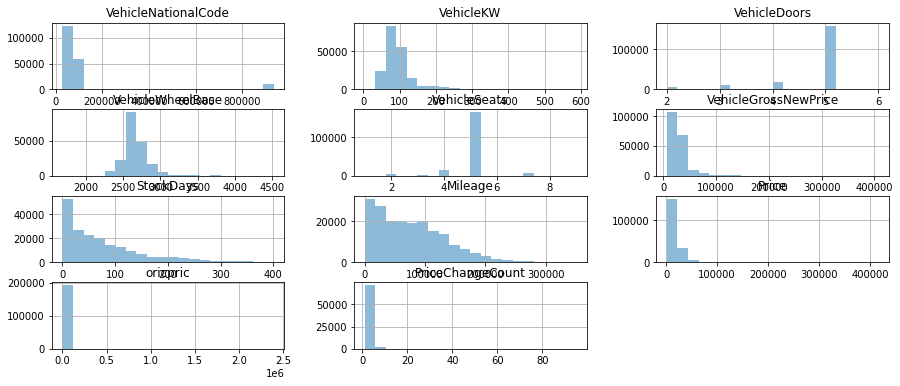

In [33]:
sae.hist(figsize=(15,6), bins=20, alpha=0.5)

In [35]:
import matplotlib.pyplot as plt

In [39]:
sae.corr()

,VehicleNationalCode,VehicleKW,VehicleDoors,VehicleWheelBase,VehicleSeats,VehicleGrossNewPrice,StockDays,Mileage,Price,oricpric,PriceChangeCount
VehicleNationalCode,1.000000,-0.083579,0.074072,-0.053826,0.014966,-0.043712,0.022416,-0.059653,0.033601,0.025691,-0.022766
VehicleKW,-0.083579,1.000000,-0.164631,0.411154,0.019813,0.893147,0.072940,-0.007747,0.780350,0.658813,0.068099
VehicleDoors,0.074072,-0.164631,1.000000,-0.029860,0.492131,-0.164046,-0.048805,-0.065068,-0.112948,-0.097082,-0.026988
VehicleWheelBase,-0.053826,0.411154,-0.029860,1.000000,0.087078,0.460204,0.050496,0.183192,0.324767,0.279545,0.035478
VehicleSeats,0.014966,0.019813,0.492131,0.087078,1.000000,-0.004058,-0.035278,-0.009541,-0.005404,-0.006874,-0.009697
VehicleGrossNewPrice,-0.043712,0.893147,-0.164046,0.460204,-0.004058,1.000000,0.081167,0.007500,0.866420,0.731732,0.063079
StockDays,0.022416,0.072940,-0.048805,0.050496,-0.035278,0.081167,1.000000,0.026342,0.061419,0.068441,0.334088
Mileage,-0.059653,-0.007747,-0.065068,0.183192,-0.009541,0.007500,0.026342,1.000000,-0.290476,-0.243228,-0.004943
Price,0.033601,0.780350,-0.112948,0.324767,-0.005404,0.866420,0.061419,-0.290476,1.000000,0.840604,0.039726
oricpric,0.025691,0.658813,-0.097082,0.279545,-0.006874,0.731732,0.068441,-0.243228,0.840604,1.000000,0.045027


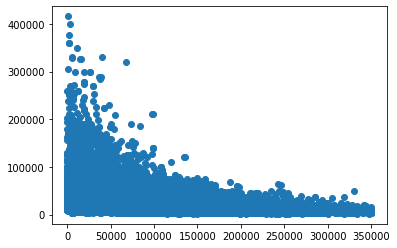

In [37]:
plt.scatter(sae['Mileage'], sae['Price'])

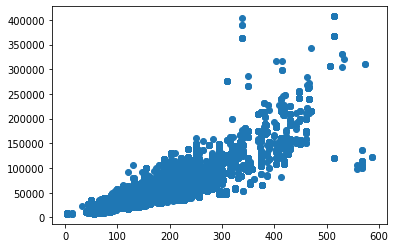

In [38]:
plt.scatter(sae['VehicleKW'], sae['VehicleGrossNewPrice'])

In [19]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

/home/christian/miniconda3/envs/ironhack/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

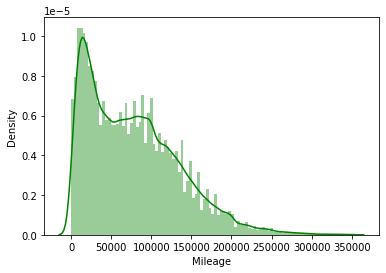

In [42]:
sns.distplot(sae['Mileage'], bins=100, color='green')

In [43]:
print("skewness: %f" % sae['Mileage'].skew())

skewness: 0.835819


In [44]:
print("Kurtosis: %f" % sae['Mileage'].kurt())

Kurtosis: 0.482005


##### It is easily identify the highly correlated (either positively or negatively) variables by looking for the grids that are highlighted

<AxesSubplot:>

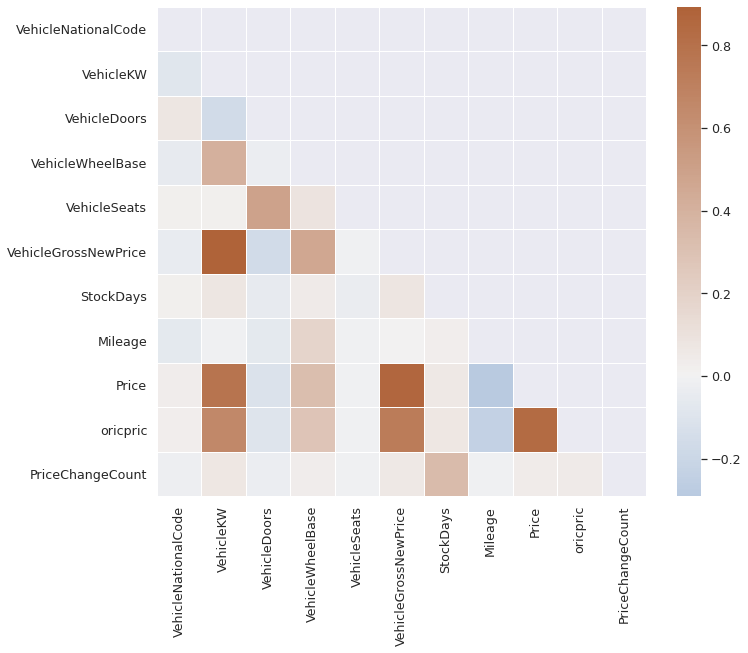

In [111]:
corr = sae.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(250,30,as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5)

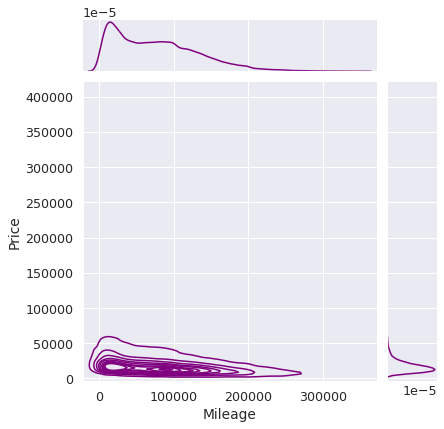

In [46]:
sns.jointplot(x='Mileage', y='Price', data=sae, kind='kde', color='purple')

#### Scatter matrix using some numeric fields

/home/christian/miniconda3/envs/ironhack/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


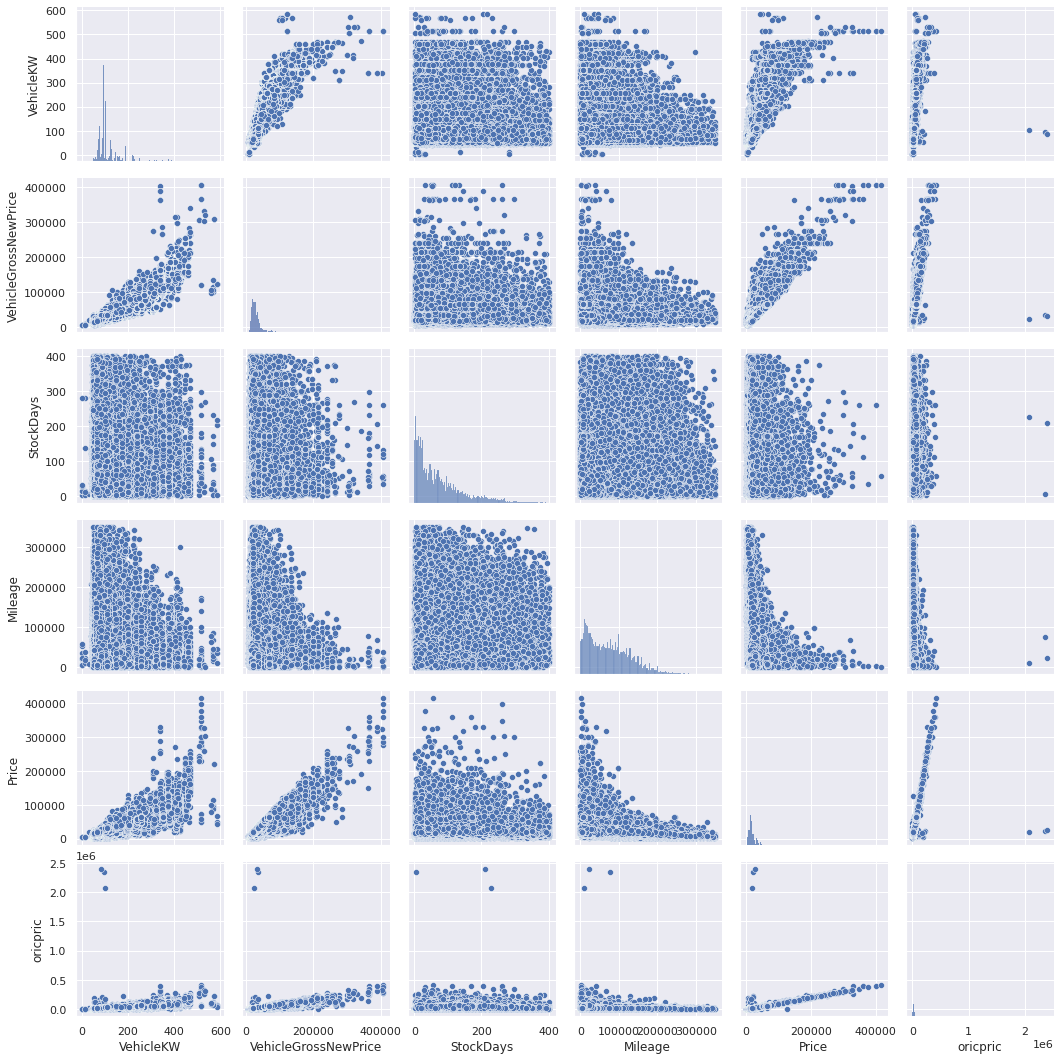

In [48]:
sns.set()
cols=['VehicleKW', 'VehicleGrossNewPrice', 'StockDays', 'Mileage', 'Price', 'oricpric']
sns.pairplot(sae[cols], size=2.5)
plt.show();

##### Since I'm asked to analyze the sale price, let's see if the price has a normal distribution. It is important because normally distributed data can be better represented with mathematical models

#### HISTOGRAM

It's a great way to look at the frequency distribution of the dataset. It seems the bulk of the data is on the left end of the scale so, it means there are a number of large outliers appear

<AxesSubplot:>

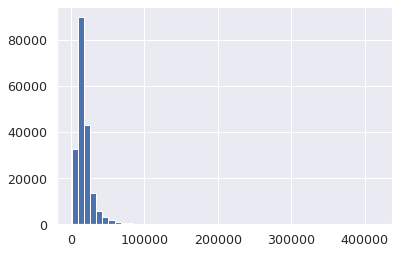

In [117]:
sae['Price'].hist(bins=50)

I have found the data dristribution is skewed to the left. In order to imporve the data visualization in the next steps, I can opt to adjust the Price column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the price.

Create a new column called PriceAdjusted to store the adjusted price

,VehicleMarketCode,VehicleNationalCode,VehicleSegmentationGlobal,VehicleModelIntlName,Bodytype_Group,Fuel_Group,Transmission_Group,Drivetype_Group,VehicleKW,VehicleDoors,...,VehicleMakeIntlName,SAEReporteddate,StockDays,PostCode,registration_date,Mileage,Price,oricpric,PriceChangeCount,PriceAdjusted
0,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,OPEL / VAUXHALL,2/3/2020,12,28983,7/1/2008,238000,2990,2990.0,NaN,8.003029
1,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,OPEL / VAUXHALL,2/3/2020,86,8940,6/15/2010,90000,4499,4499.0,NaN,8.411610
2,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,OPEL / VAUXHALL,2/3/2020,279,8840,7/1/2005,210000,2490,2700.0,1.0,7.820038
3,ES,30020,E,607,Sedan,Diesel,Automated,2WD,150,4.0,...,PEUGEOT,10/12/2022,55,27002,10/15/2009,259000,6500,6500.0,NaN,8.779557
4,ES,30020,E,607,Sedan,Diesel,Automated,2WD,150,4.0,...,PEUGEOT,2/3/2020,75,18015,7/1/2006,155000,4900,7500.0,1.0,8.496990


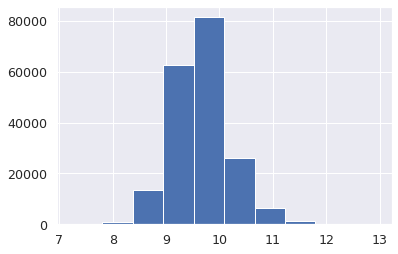

In [119]:
sae['PriceAdjusted']=sae['Price'].apply(np.log)
sae['PriceAdjusted'].hist()
sae.head()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='[Mileage]', ylabel='[Price]'>

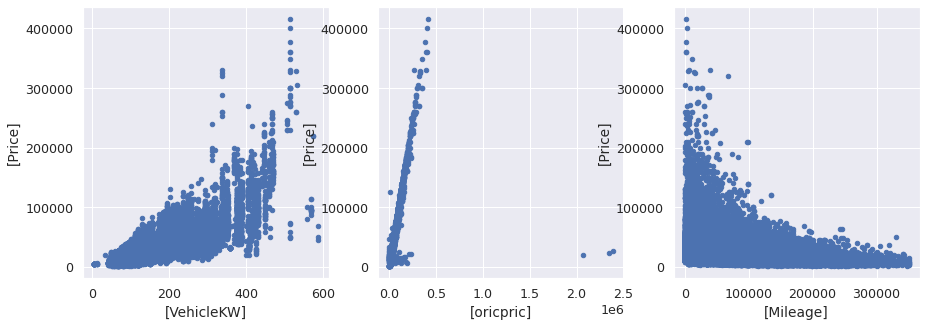

In [122]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sae.plot(x=['VehicleKW'], y=['Price'], kind='scatter', ax=axes[0])
sae.plot(x=['oricpric'], y=['Price'], kind='scatter', ax=axes[1])
sae.plot(x=['Mileage'], y=['Price'], kind='scatter', ax=axes[2])

#### BOXPLOT

Box plots are a visualization of a distribution of a dataset based on a 5-number summary: minimum, 25th percentile, mean, median, 75th percentile and maximum.

Data between the 25th and 75th percentiles is drawn inside the box. Boundary outside of the box called the whiskers. Box plots also indicate how extreme outliers are by plotting them as individual points.

The box plot confirms the initial suspicious tha the data is skewed. Easy to see small boxes for those values and lots of outliers outside of the whiskers.

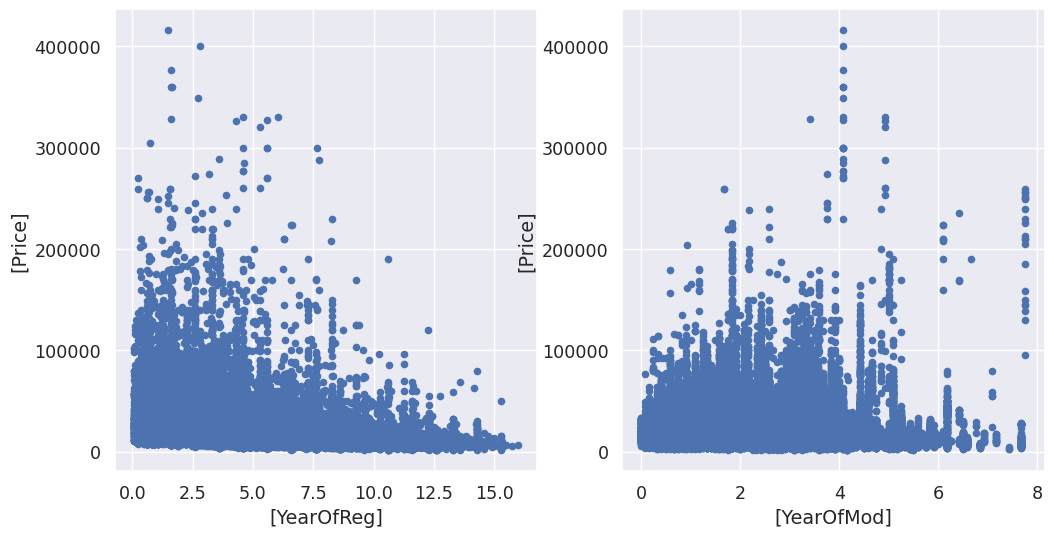

In [52]:
fig, axes=plt.subplots(1,2,figsize=(12,6))

sae.plot(x=['YearOfReg'], y=['Price'], kind='scatter', ax=axes[0])
sae.plot(x=['YearOfMod'], y=['Price'], kind='scatter', ax=axes[1])